In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.patches as mpatches

#in order to simulate a stream of electrons hitting the particles at once, we will make the 
#kinetic energy of an electron from the solar wind very large (~ 10 keV)

In [2]:
##particle class - defines the attributes of a particle 
class Particle(object):
    def __init__(self, vel, mass, wavelength, ionEnergy):
        self.vel = vel
        self.mass = mass
        self.wavelength = wavelength
        self.ionEnergy = ionEnergy
    
    def pVel(self):
        return self.vel
    def pMass(self):
        return self.mass
    def pLam(self):
        return self.wavelength
    def pIE(self):
        return self.ionEnergy
        
        

In [21]:
##fill atmosphere with proper density and composition of particles
## percentage = percentage of atmosphere
## color = wavelength color
## index (1,2,3) is used later on in the code
##78% blue, 1 (nitrogen)
n = Particle(0,4.6*10**-23,680,2.32*10**-18)
##21% green, 2 (oxygen)
o = Particle(0,2.65*10**-23,550,2.18*10**-18) 
##0.9% violet, 3 (nitrogen)
ar = Particle(0,6.63*10**-23,410,2.52*10**-18) 


#0.1 KeV = 1.6*10**-17
#0.25 KeV = 4*10**-17
#0.5 KeV = 8*10**-17
#0.75 KeV = 1.2*10**-16
#1.0 KeV  = 1.6*10**-16
e = Particle(4.4*10**5,9.11*10**-31,0, 1.6*10**-16)

#Here we create a 5x5x5 meshgrid to represent our atmosphere
x, y, z = np.meshgrid(np.arange(0,5,1),np.arange(0,5,1),np.arange(0,5,1)) 


z1d = z.ravel()
y1d = y.ravel()
x1d = x.ravel()
x = x*0
y = y*0
z = z*0

#fill the atmosphere with the correct composition of particles with an exponentially decreasing density
for zC in z1d:
    dense = 0.5**(zC) #approximate the density of each z layer using this function
    for yC in y:
        for xC in x:
            fill = np.int(dense*5)
            zeroCount = 5-fill #how many zeros should be in the xy plane of this layer
            while(fill>=0 and zeroCount >= 0):
                rand = np.random.randint(1,13) #the random number determines which particle to fill the spsce with
                if(rand > 0 and rand < 8): #index 1 = nitrogen
                    x[xC,yC,zC] = 1
                    y[xC,yC,zC] = 1
                    z[xC,yC,zC] = 1
                    fill-=1
                if(rand>=8 and rand<=9): #index 2 = oxygen
                    x[xC,yC,zC] = 2
                    y[xC,yC,zC] = 2
                    z[xC,yC,zC] = 2
                    fill-=1
                if(rand>9 and rand<11): #index 3 = argon
                    x[xC,yC,zC] = 3
                    y[xC,yC,zC] = 3
                    z[xC,yC,zC] = 3
                    fill-=1
                if(rand>=11 and rand<13): #fill space with no particle
                    x[xC,yC,zC] = 0
                    y[xC,yC,zC] = 0
                    z[xC,yC,zC] = 0
                    zeroCount -=1
zr = z.ravel()  
#reverse the arrays that way the highest concentration of zeros is at the top of the atmosphere meshgrid
x_rev = x[::-1]
y_rev = y[::-1]
z_rev = z[::-1]  
print(z_rev)
##particle being shot in
## follows b field at z=-y

[[[0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]
  [0 0 0 0 0]]

 [[3 3 1 1 1]
  [0 1 1 1 1]
  [2 1 3 1 2]
  [2 1 1 1 1]
  [0 0 0 0 0]]

 [[3 3 1 1 1]
  [0 1 1 1 1]
  [2 1 1 1 1]
  [0 1 1 1 1]
  [0 0 0 0 0]]

 [[3 3 1 1 1]
  [2 1 1 1 1]
  [0 1 1 1 1]
  [0 1 1 1 1]
  [0 0 0 0 0]]

 [[3 1 1 1 1]
  [2 1 1 1 1]
  [2 1 1 1 1]
  [2 1 1 1 1]
  [0 0 0 0 0]]]


In [4]:
#the cube we plot helps us make sure enough of the path of our particle stream enters our cube of atmosphere.
def plot_cube(cube_definition):
    cube_definition_array = [
        np.array(list(item))
        for item in cube_definition
    ]

    points = []
    points += cube_definition_array
    vectors = [
        cube_definition_array[1] - cube_definition_array[0], 
        cube_definition_array[2] - cube_definition_array[0],
        cube_definition_array[3] - cube_definition_array[0]
    ]
#create 3 vectors in x,y,z directions
    points += [cube_definition_array[0] + vectors[0] + vectors[1]] 
    points += [cube_definition_array[0] + vectors[0] + vectors[2]]
    points += [cube_definition_array[0] + vectors[1] + vectors[2]]
    points += [cube_definition_array[0] + vectors[0] + vectors[1] + vectors[2]]

    points = np.array(points)

    #build edge lines of cube based off of points along the vectors
    edges = [
        [points[0], points[3], points[5], points[1]],
        [points[1], points[5], points[7], points[4]],
        [points[4], points[2], points[6], points[7]],
        [points[2], points[6], points[3], points[0]],
        [points[0], points[2], points[4], points[1]],
        [points[3], points[6], points[7], points[5]]
    ]

    faces = Poly3DCollection(edges, linewidths=1, edgecolors='k')
    faces.set_facecolor((0,0,1,0.1))

    ax.add_collection3d(faces)

    # Plot the points themselves to force the scaling of the axes
    ax.scatter(points[:,0], points[:,1], points[:,2], s=0)

Text(0.5,0,'z')

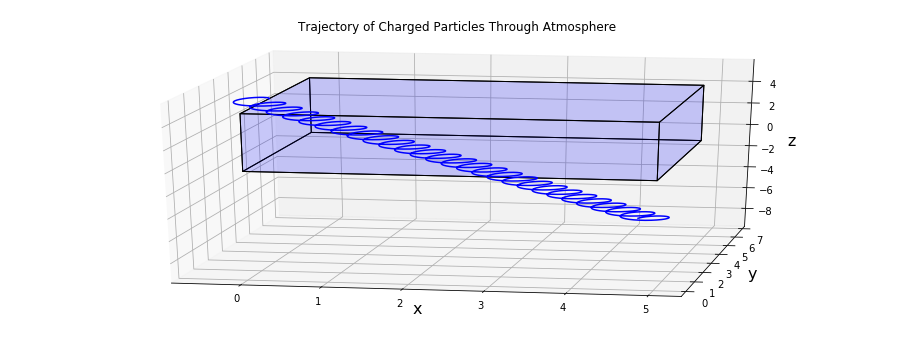

In [5]:
##### trajectory
def get_EB(r):
    '''
    This function returns the E and B fields for a specified situation as a function of position.
    Input: r -- position vector: a numpy array of 3 values, e.g. np.array([x,y,z])
    Returns: E,B -- 3-vectors of E- and B-field values at r.
    '''
    x = r[0]
    y = r[1]
    z = r[2]

    E = np.array([0,0,0])
    B = np.array([1,1,-3])
    return E,B

def calc_trajectory(r0,v0,q,m,dt,Nstep):
  
    Nstep = int(Nstep)      # make sure Nstep is an integer
    r = np.zeros([Nstep,3])   # array of positions (x,y,z) at each timestep
    v = np.zeros([Nstep,3])   # array of velocities (vx,vy,vz) at each timestep
    t = np.zeros(Nstep)
    r[0,:] = r0             # fill first element with initial values
    v[0,:] = v0
    i = 0
    while i < Nstep-1:
        current_pos = r[i,:]
        current_vel = v[i,:]
        
        E,B = get_EB(current_pos) 
        a = (q*E + q*np.cross(current_vel,B))/m
        ##implements a second-order Runge-Kutta integration
        mid_vel = current_vel + a*dt/2.
        mid_pos = current_pos + mid_vel*dt/2.
        E2, B2 = get_EB(mid_pos)
        a2 = (q*E2 + q*np.cross(mid_vel,B2))/m
        next_vel = current_vel + a2*dt
        next_pos = current_pos + mid_vel*dt

        v[i+1,:] = next_vel
        r[i+1,:] = next_pos
        t[i+1] = t[i] + dt
        i+=1
    return r,v,t
r0 = np.array([0,2,5])
v0 = np.array([0,1,0])
q = 1.
m = 1.
delta_t = 0.005
N = 1e4

r,v,t = calc_trajectory(r0,v0,q,m,delta_t,N)
xp = r[:,0]
yp = r[:,1]
zp = r[:,2]

fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)
ax.plot(xp,yp,zp, color='b')

cube_definition = [ #defines a 5x5x5 cube to help us visualize what electrons look like going through our atmosphere
    (0,0,0), (0,5,0), (5,0,0), (0,0,5)
]
plot_cube(cube_definition)
ax.set_title('Trajectory of Charged Particles Through Atmosphere')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)


Text(0.5,0,'z')

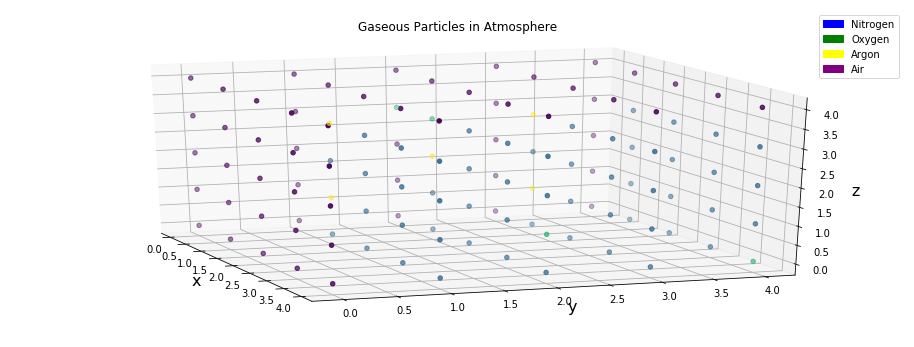

In [6]:
#plotting the particles in the atmosphere
fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-20)

p = ax.scatter(z1d,y1d,x1d, marker = "o", c=z_rev.ravel()) 

blue_patch = mpatches.Patch(color='b', label='Nitrogen')
green_patch = mpatches.Patch(color='g', label='Oxygen')
yellow_patch = mpatches.Patch(color='yellow', label='Argon')
purple_patch = mpatches.Patch(color='purple', label='Air')

plt.legend(handles=[blue_patch, green_patch, yellow_patch, purple_patch])
ax.set_title('Gaseous Particles in Atmosphere')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)

# Modelling the Particle Collisions of the Northern Lights
We will model various scenarios of the northern lights, based on the value of the energy contained in the moving charge. When more energy is contained within the electron, more collisions occur and the northern lights become larger.

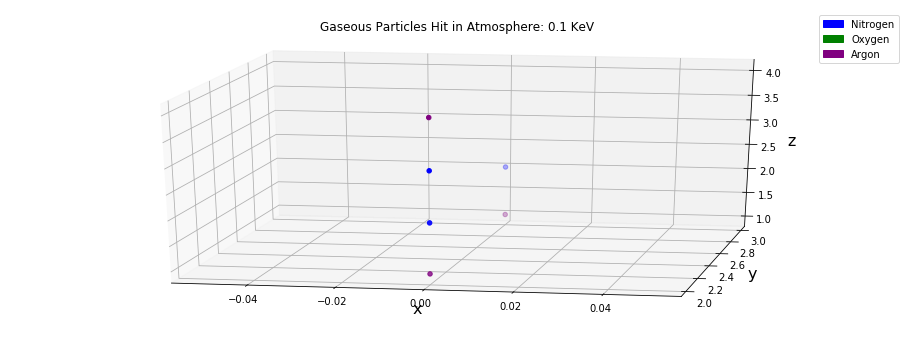

In [12]:
#shoot particle into sloped field (electron energy = 0.1KeV)

xp = np.around(xp, 2) #rounds values to two decimal places
yp = np.around(yp, 2)
zp = np.around(zp, 2)

pointsHit_xn = []
pointsHit_yn = []
pointsHit_zn = []

pointsHit_xo = []
pointsHit_yo = []
pointsHit_zo = []

pointsHit_xar = []
pointsHit_yar = []
pointsHit_zar = []



pDiff = .00001

x_step = np.arange(0,5,1)
y_step = np.arange(0,5,1)
z_step = np.arange(0,5,1)

energyTot = e.pIE() #initail starting energy of the electron
for px in x_step: 
    for py in y_step:
        for pz in z_step:
            cx = np.arange(px-pDiff, px+pDiff, .000001) #creates a range of numbers for the electron to hit
            cy = np.arange(py-pDiff, py+pDiff, .000001) #that way the collision does not have to be an exact point
            cz = np.arange(pz-pDiff, pz+pDiff, .000001)
            cx = np.around(cx, 2)  #rounds numbers to 2 decimal places
            cy = np.around(cy, 2)
            cz = np.around(cz, 2)
            if (np.isin(cx, xp)).any() and energyTot > 2.52*10**(-18): #if the electron has enough energy to ionize a particle
                if (np.isin(cy,yp)).any():
                    if (np.isin(cz, zp)).any() :
                        if(x[px,py,pz] == 1):
                            pointsHit_xn.append(px) #add the point to the list of collisions
                            pointsHit_yn.append(py)
                            pointsHit_zn.append(pz)
                            energyTot = energyTot - n.pIE() #subtract the ionization energy from the total energy in the electron
                            x[px,py,pz] = n.pLam() #assign correct wavelength of the emitted photon to the point
                        if(x[px,py,pz] == 2):
                            pointsHit_xo.append(px)
                            pointsHit_yo.append(py)
                            pointsHit_zo.append(pz)
                            energyTot = energyTot - o.pIE()
                            x[px,py,pz] = o.pLam()
                        if(x[px,py,pz] == 3):
                            pointsHit_xar.append(px)
                            pointsHit_yar.append(py)
                            pointsHit_zar.append(pz)
                            energyTot = energyTot - ar.pIE()
                            x[px,py,pz] = ar.pLam()
            else:
                x[px,py,pz] = 0 #if nothing happens, set the value to zero (no photon emitted)
                            
    
fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)

#plot where the photons are released
p = ax.scatter(pointsHit_xn, pointsHit_yn, pointsHit_zn, marker = "o", c='b')
p = ax.scatter(pointsHit_xo, pointsHit_yo, pointsHit_zo, marker = "o", c='g')
p = ax.scatter(pointsHit_xar, pointsHit_yar, pointsHit_zar, marker = "o", c='purple')
blue_patch = mpatches.Patch(color='b', label='Nitrogen')
red_patch = mpatches.Patch(color='g', label='Oxygen')
green_patch = mpatches.Patch(color='purple', label='Argon')
plt.legend(handles=[blue_patch, red_patch, green_patch])
ax.set_title('Gaseous Particles Hit in Atmosphere: 0.1 KeV')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()




Very few particles are ionized, because the electron runs out of ionization energy fairly quickly. It is difficult to observe the helical motion of the electrons with this low of an energy.

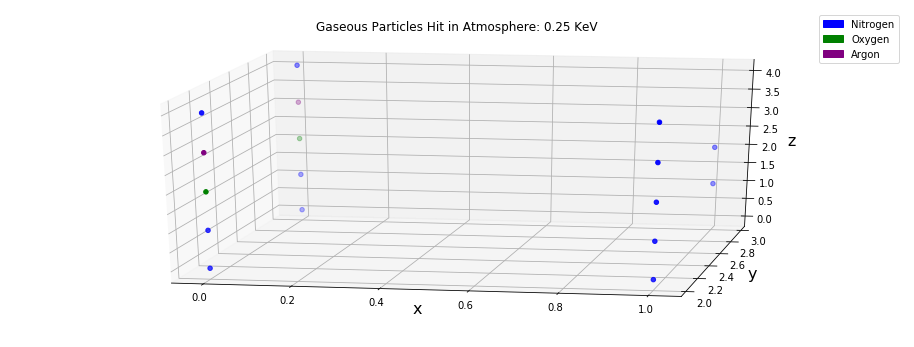

In [15]:
#shoot particle into sloped field (electron energy = 0.25KeV)
#same as the previous code, just with a different electron energy
xp = np.around(xp, 2) #rounds numbers to two decimal places
yp = np.around(yp, 2)
zp = np.around(zp, 2)

pointsHit_xn = []
pointsHit_yn = []
pointsHit_zn = []

pointsHit_xo = []
pointsHit_yo = []
pointsHit_zo = []

pointsHit_xar = []
pointsHit_yar = []
pointsHit_zar = []


pDiff = .00001

x_step = np.arange(0,5,1)
y_step = np.arange(0,5,1)
z_step = np.arange(0,5,1)
energyTot = e.pIE()
for px in x_step: 
    for py in y_step:
        for pz in z_step:
            cx = np.arange(px-pDiff, px+pDiff, .000001) #creates a range of numbers for the electron to hit
            cy = np.arange(py-pDiff, py+pDiff, .000001) #that way the collision does not have to be an exact point
            cz = np.arange(pz-pDiff, pz+pDiff, .000001)
            cx = np.around(cx, 2)  #rounds numbers to 2 decimal places
            cy = np.around(cy, 2)
            cz = np.around(cz, 2) 
            if (np.isin(cx, xp)).any() and energyTot > 2.52*10**(-18):
                if (np.isin(cy,yp)).any():
                    if (np.isin(cz, zp)).any() :
                        if(x[px,py,pz] == 1):
                            pointsHit_xn.append(px) #add the point to the list of collisions
                            pointsHit_yn.append(py)
                            pointsHit_zn.append(pz)
                            energyTot = energyTot - n.pIE() #subtract the ionization energy from the total energy in the electron
                            x[px,py,pz] = n.pLam() #assign correct wavelength of the emitted photon to the point
                        if(x[px,py,pz] == 2):
                            pointsHit_xo.append(px)
                            pointsHit_yo.append(py)
                            pointsHit_zo.append(pz)
                            energyTot = energyTot - o.pIE()
                            x[px,py,pz] = o.pLam()
                        if(x[px,py,pz] == 3):
                            pointsHit_xar.append(px)
                            pointsHit_yar.append(py)
                            pointsHit_zar.append(pz)
                            energyTot = energyTot - ar.pIE()
                            x[px,py,pz] = ar.pLam()
            else:
                x[px,py,pz] = 0          

fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)

#plot where the photons are released
p = ax.scatter(pointsHit_xn, pointsHit_yn, pointsHit_zn, marker = "o", c='b')
p = ax.scatter(pointsHit_xo, pointsHit_yo, pointsHit_zo, marker = "o", c='g')
p = ax.scatter(pointsHit_xar, pointsHit_yar, pointsHit_zar, marker = "o", c='purple')
blue_patch = mpatches.Patch(color='b', label='Nitrogen')
red_patch = mpatches.Patch(color='g', label='Oxygen')
green_patch = mpatches.Patch(color='purple', label='Argon')
plt.legend(handles=[blue_patch, red_patch, green_patch])
ax.set_title('Gaseous Particles Hit in Atmosphere: 0.25 KeV')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()


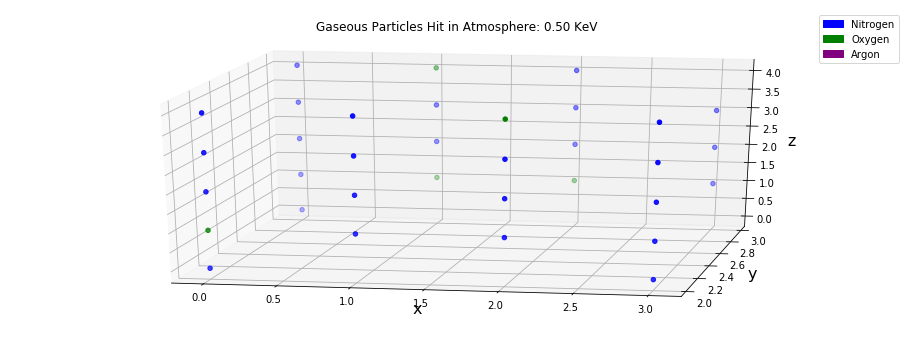

In [17]:
#shoot particle into sloped field (electron energy = 0.50KeV)
xp = np.around(xp, 2)
yp = np.around(yp, 2)
zp = np.around(zp, 2)

pointsHit_xn = []
pointsHit_yn = []
pointsHit_zn = []

pointsHit_xo = []
pointsHit_yo = []
pointsHit_zo = []

pointsHit_xar = []
pointsHit_yar = []
pointsHit_zar = []

pDiff = .00001

x_step = np.arange(0,5,1)
y_step = np.arange(0,5,1)
z_step = np.arange(0,5,1)

energyTot = e.pIE()
for px in x_step: 
    for py in y_step:
        for pz in z_step:
            cx = np.arange(px-pDiff, px+pDiff, .000001)
            cy = np.arange(py-pDiff, py+pDiff, .000001)
            cz = np.arange(pz-pDiff, pz+pDiff, .000001)
            cx = np.around(cx, 2)  #rounds numbers to 2 decimal places
            cy = np.around(cy, 2)
            cz = np.around(cz, 2)
            if (np.isin(cx, xp)).any() and energyTot > 2.52*10**(-18):
                if (np.isin(cy,yp)).any():
                    if (np.isin(cz, zp)).any() :
                        if(x[px,py,pz] == 1):
                            pointsHit_xn.append(px)
                            pointsHit_yn.append(py)
                            pointsHit_zn.append(pz)
                            energyTot = energyTot - n.pIE()
                            x[px,py,pz] = n.pLam()
                        if(x[px,py,pz] == 2):
                            pointsHit_xo.append(px)
                            pointsHit_yo.append(py)
                            pointsHit_zo.append(pz)
                            energyTot = energyTot - o.pIE()
                            x[px,py,pz] = o.pLam()
                        if(x[px,py,pz] == 3):
                            pointsHit_xar.append(px)
                            pointsHit_yar.append(py)
                            pointsHit_zar.append(pz)
                            energyTot = energyTot - ar.pIE()
                            x[px,py,pz] = ar.pLam()
            else:
                x[px,py,pz] = 0
                            
fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)

p = ax.scatter(pointsHit_xn, pointsHit_yn, pointsHit_zn, marker = "o", c='b')
p = ax.scatter(pointsHit_xo, pointsHit_yo, pointsHit_zo, marker = "o", c='g')
p = ax.scatter(pointsHit_xar, pointsHit_yar, pointsHit_zar, marker = "o", c='purple')
blue_patch = mpatches.Patch(color='b', label='Nitrogen')
red_patch = mpatches.Patch(color='g', label='Oxygen')
green_patch = mpatches.Patch(color='purple', label='Argon')
plt.legend(handles=[blue_patch, red_patch, green_patch])
ax.set_title('Gaseous Particles Hit in Atmosphere: 0.50 KeV')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()





The helical and sloped motion of the electrons is easily seen in the graph above. 

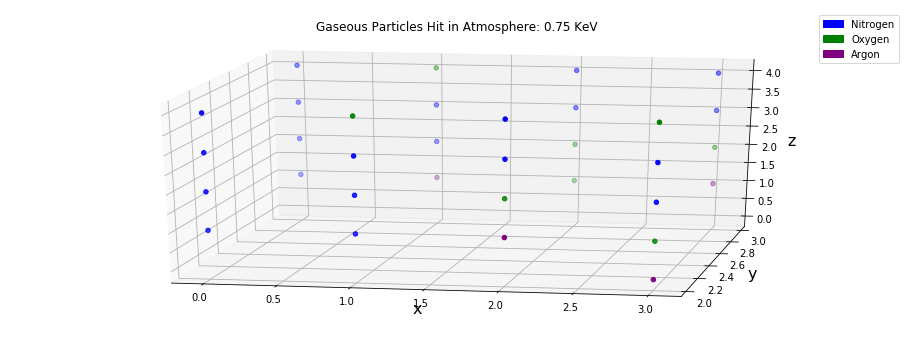

In [20]:
#shoot particle into sloped field (electron energy = 0.75KeV)
xp = np.around(xp, 2)
yp = np.around(yp, 2)
zp = np.around(zp, 2)

pointsHit_xn = []
pointsHit_yn = []
pointsHit_zn = []

pointsHit_xo = []
pointsHit_yo = []
pointsHit_zo = []

pointsHit_xar = []
pointsHit_yar = []
pointsHit_zar = []



pDiff = .00001

x_step = np.arange(0,5,1)
y_step = np.arange(0,5,1)
z_step = np.arange(0,5,1)

energyTot = e.pIE()
for px in x_step: 
    for py in y_step:
        for pz in z_step:
            cx = np.arange(px-pDiff, px+pDiff, .000001)
            cy = np.arange(py-pDiff, py+pDiff, .000001)
            cz = np.arange(pz-pDiff, pz+pDiff, .000001)
            cx = np.around(cx, 2)  #rounds numbers to 2 decimal places
            cy = np.around(cy, 2)
            cz = np.around(cz, 2)
            if (np.isin(cx, xp)).any() and energyTot > 2.52*10**(-18):
                if (np.isin(cy,yp)).any():
                    if (np.isin(cz, zp)).any() :
                        if(x[px,py,pz] == 1):
                            pointsHit_xn.append(px)
                            pointsHit_yn.append(py)
                            pointsHit_zn.append(pz)
                            energyTot = energyTot - n.pIE()
                            x[px,py,pz] = n.pLam()
                        if(x[px,py,pz] == 2):
                            pointsHit_xo.append(px)
                            pointsHit_yo.append(py)
                            pointsHit_zo.append(pz)
                            energyTot = energyTot - o.pIE()
                            x[px,py,pz] = o.pLam()
                        if(x[px,py,pz] == 3):
                            pointsHit_xar.append(px)
                            pointsHit_yar.append(py)
                            pointsHit_zar.append(pz)
                            energyTot = energyTot - ar.pIE()
                            x[px,py,pz] = ar.pLam()
            else:
                x[px,py,pz] = 0
                            
fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)


p = ax.scatter(pointsHit_xn, pointsHit_yn, pointsHit_zn, marker = "o", c='b')
p = ax.scatter(pointsHit_xo, pointsHit_yo, pointsHit_zo, marker = "o", c='g')
p = ax.scatter(pointsHit_xar, pointsHit_yar, pointsHit_zar, marker = "o", c='purple')
blue_patch = mpatches.Patch(color='b', label='Nitrogen')
red_patch = mpatches.Patch(color='g', label='Oxygen')
green_patch = mpatches.Patch(color='purple', label='Argon')
plt.legend(handles=[blue_patch, red_patch, green_patch])
ax.set_title('Gaseous Particles Hit in Atmosphere: 0.75 KeV')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()





There are more ionized particles in this graph than the previous one, because the electron has a higher energy and thus can ionize more particles in the atmosphere.

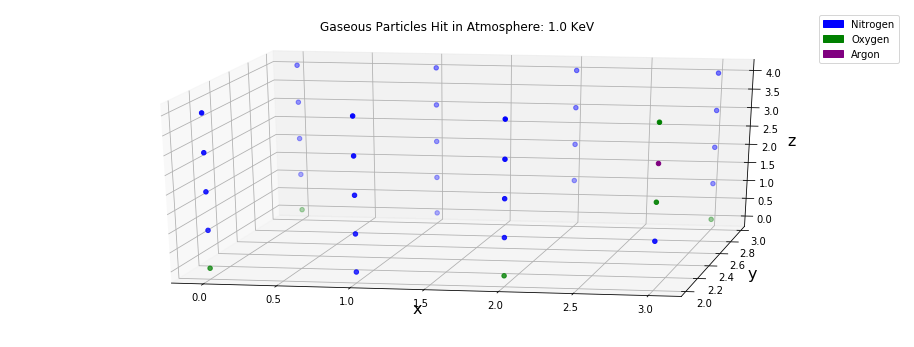

In [22]:
#shoot particle into sloped field (electron energy = 1.0KeV)
xp = np.around(xp, 2)
yp = np.around(yp, 2)
zp = np.around(zp, 2)

pointsHit_xn = []
pointsHit_yn = []
pointsHit_zn = []

pointsHit_xo = []
pointsHit_yo = []
pointsHit_zo = []

pointsHit_xar = []
pointsHit_yar = []
pointsHit_zar = []


pDiff = .00001

x_step = np.arange(0,5,1)
y_step = np.arange(0,5,1)
z_step = np.arange(0,5,1)
energyTot = e.pIE()
for px in x_step: 
    for py in y_step:
        for pz in z_step:
            cx = np.arange(px-pDiff, px+pDiff, .000001)
            cy = np.arange(py-pDiff, py+pDiff, .000001)
            cz = np.arange(pz-pDiff, pz+pDiff, .000001)
            cx = np.around(cx, 2)  #rounds numbers to 2 decimal places
            cy = np.around(cy, 2)
            cz = np.around(cz, 2)
            if (np.isin(cx, xp)).any() and energyTot > 2.52*10**(-18):
                if (np.isin(cy,yp)).any():
                    if (np.isin(cz, zp)).any() :
                        if(x[px,py,pz] == 1):
                            pointsHit_xn.append(px)
                            pointsHit_yn.append(py)
                            pointsHit_zn.append(pz)
                            energyTot = energyTot - n.pIE()
                            x[px,py,pz] = n.pLam()
                        if(x[px,py,pz] == 2):
                            pointsHit_xo.append(px)
                            pointsHit_yo.append(py)
                            pointsHit_zo.append(pz)
                            energyTot = energyTot - o.pIE()
                            x[px,py,pz] = o.pLam()
                        if(x[px,py,pz] == 3):
                            pointsHit_xar.append(px)
                            pointsHit_yar.append(py)
                            pointsHit_zar.append(pz)
                            energyTot = energyTot - ar.pIE()
                            x[px,py,pz] = ar.pLam()
            else:
                x[px,py,pz] = 0
                            
fig = plt.figure(1, figsize=(16,6))
ax = fig.gca(projection='3d')
ax.view_init(20,-80)


p = ax.scatter(pointsHit_xn, pointsHit_yn, pointsHit_zn, marker = "o", c='b')
p = ax.scatter(pointsHit_xo, pointsHit_yo, pointsHit_zo, marker = "o", c='g')
p = ax.scatter(pointsHit_xar, pointsHit_yar, pointsHit_zar, marker = "o", c='purple')
blue_patch = mpatches.Patch(color='b', label='Nitrogen')
red_patch = mpatches.Patch(color='g', label='Oxygen')
green_patch = mpatches.Patch(color='purple', label='Argon')
plt.legend(handles=[blue_patch, red_patch, green_patch])
ax.set_title('Gaseous Particles Hit in Atmosphere: 1.0 KeV')
ax.set_xlabel('x', fontsize=16)
ax.set_ylabel('y', fontsize=16)
ax.set_zlabel('z', fontsize=16)
plt.show()



